In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm

Сгенерируем выборку $X_1, \dots, X_{100}$ из распределения $Cauchy(0, 1)$:

In [29]:
N = 100
x_dist = cauchy.rvs(loc=0, scale=1, size=N)

Возьмем в качестве априорного распределения сопряженное распределение к $N(a, \sigma^2)$ — $N(a_0, \sigma_0^2)$. 
Подберем такие параметры $a_0$ и $\sigma_0^2$, чтобы они учитывали свойство: $P(\lvert \theta \rvert < 0.5) \geq 0.95$. 
Найдем параметры, при которых выполняется равенство.

$$a_0 = 0$$

$$P \left( -\frac{0.5}{\sigma_0} < \frac{\theta}{\sigma_0} < \frac{0.5}{\sigma_0} \right) = \alpha$$

$$P \left( -z_{1 - \alpha / 2 - 0.5} < \frac{\theta}{\sigma_0} < z_{\alpha / 2 + 0.5} \right) = \alpha,$$

где $z_\alpha$ — квантиль уровня $\alpha$.

$$\frac{0.5}{\sigma_0} = z_{0.5 - \alpha / 2} \quad \Rightarrow \quad \sigma_0^2 = \frac{1}{4z_{0.5 - \alpha / 2}^2}$$

Учитывая, что $\alpha = 0.95$, посчитаем $\sigma_0^2$:

In [30]:
sigma_0 = 1 / (4 * (norm.ppf(1 - 0.95 / 2 - 0.5) ** 2))

Осталось посчитать байесовские оценки и оценки максимального правдоподобия:

$$\widehat{\theta} = \frac{\frac{a_0}{\sigma_0^2} + \sum{X_i}}{\frac{1}{\sigma_0^2} + n},$$

$$\widehat{\theta}_\text{МП} = \overline{X}$$

Построим график модуля отклонения оценки от истинного значения параметра $\theta = 0$:

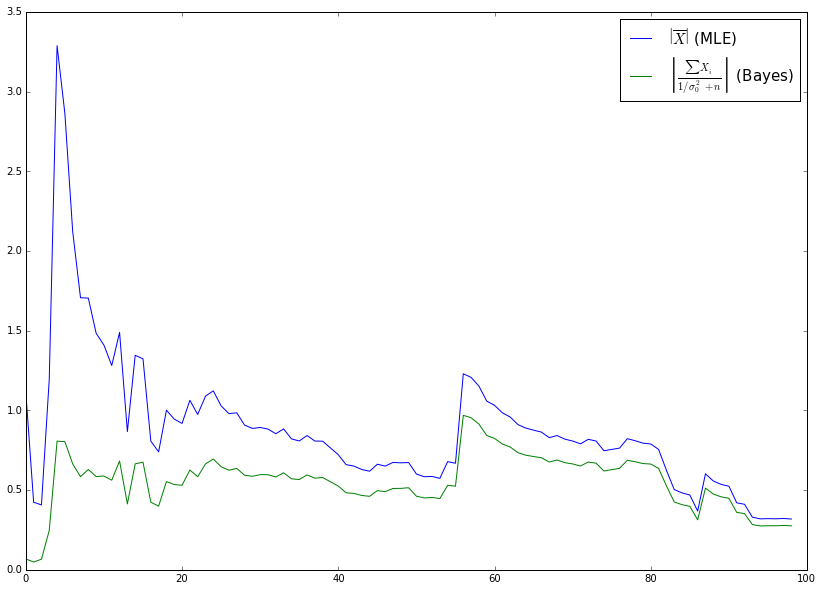

In [32]:
mle = [np.average(x_dist[:n]) for n in range (1, N)]
bayes = [np.sum(x_dist[:n]) / (1 / sigma_0 + n) for n in range (1, N)]

plt.figure(figsize=(14, 10))
plt.plot(abs(np.zeros(N - 1) - mle), 
         label='$\\left| \\overline{X} \\right|$ (MLE)')
plt.plot(abs(np.zeros(N - 1) - bayes), 
         label='$\\left| \\frac{\\sum{X_i}}' 
             + '{1 / \\sigma_0^2 + n} \\right|$ (Bayes)')
plt.legend(fontsize=15)
plt.show()

Из графика видно, что байесовская оценка лучше оценки максимального правдоподобия, но обе они плохо оценивают параметр.
Это объясняется тем, что выборку мы брали из распределения Коши, у которого нет матожидания.